Analyzing: CEQTL3-50L2-BC3
File: ../data/analysis-Amplicon-203-demultiplex.bc1003_BAK8A_OA--bc1003_BAK8A_OA.hifi_reads.fastq


> Reading in all reads...
Number Unique Reads: 347,676
Number Reads:        477,561


> Parsing Enhancer Seq Using Linkers...
318,639 reads with enLinker
160,468 reads with en


> Parsing Barcode Seq Using Linkers...
76,605 reads with both bcLinkers detected


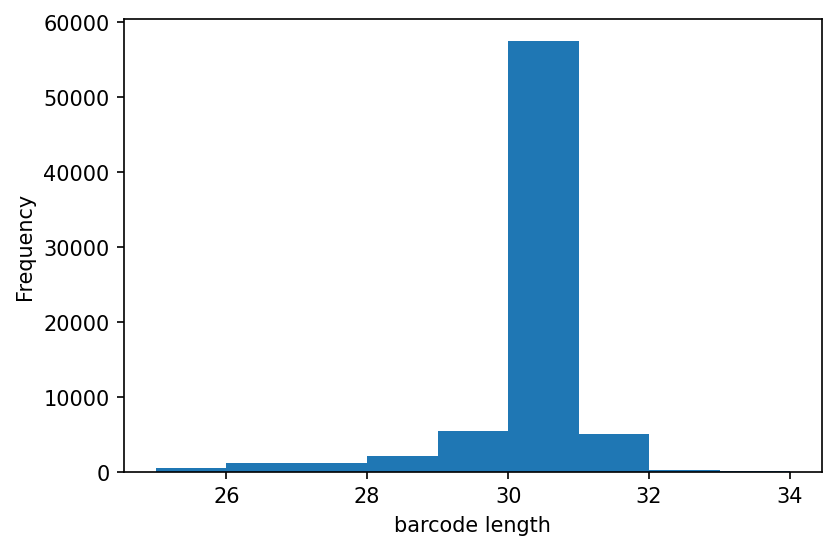



 -----------------------------------------
-----------------------------------------
-----------------------------------------

Analysis of unfiltered library (ie unique + mm barcodes)...


> Searching for ordered enhancers missing in library...
1 Enhancers missing in library
	 EC21-ref


> Searching for multiple matches...
# Bc total = 4483
# Bc mm    = 380
% Bc mm    = 8.5%


Printing some examples of multiple match barcodes
	 TATCGCTGTACCGATGTGTTGCTGGCCTGC ['EC22-alt', 'EC19-ref']
	 TTATTCTGCATGGGGGGATCTTTATTTAAC ['EC6-alt', 'EC19-alt']
	 TCGCCTCTAATGTCTCGGTGCTTTCGCTCG ['EC19-alt', 'EC9-alt']
	 TGCATCTGGGTATAGCTACGAGGCCGGGAG ['MA16-alt', 'MA27-alt']
	 ATGCCTCCAGGTTTGTGGATCCTCCGTCAA ['EC4-alt', 'MA19-alt']


 -----------------------------------------
-----------------------------------------
-----------------------------------------

Analysis of filtered library (ie unique barcodes only)...


> Searching for ordered enhancers missing in library...
1 Enhancers missing in library
	 E

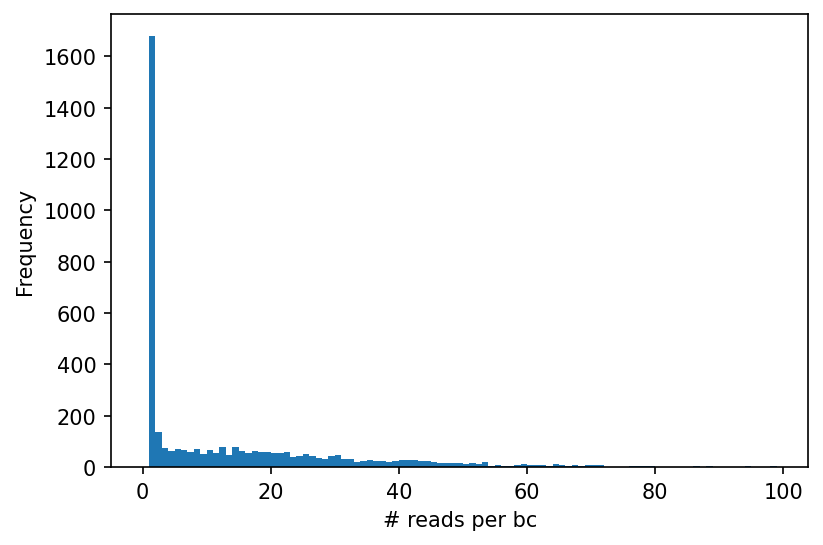

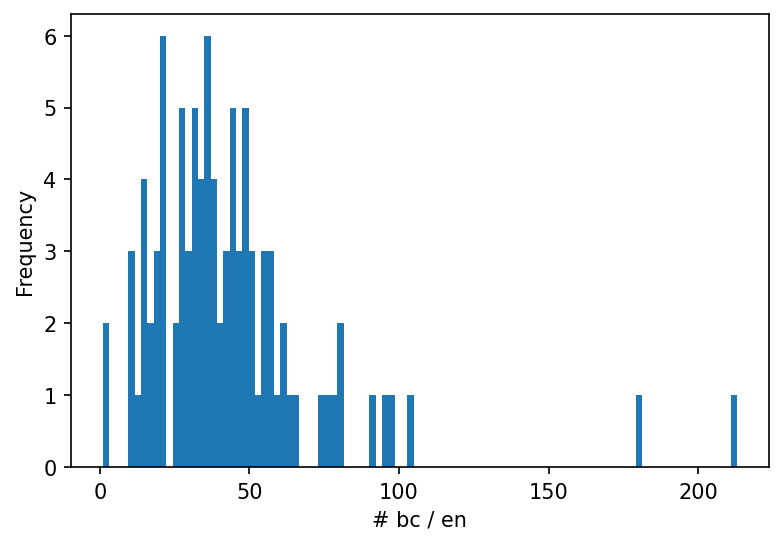

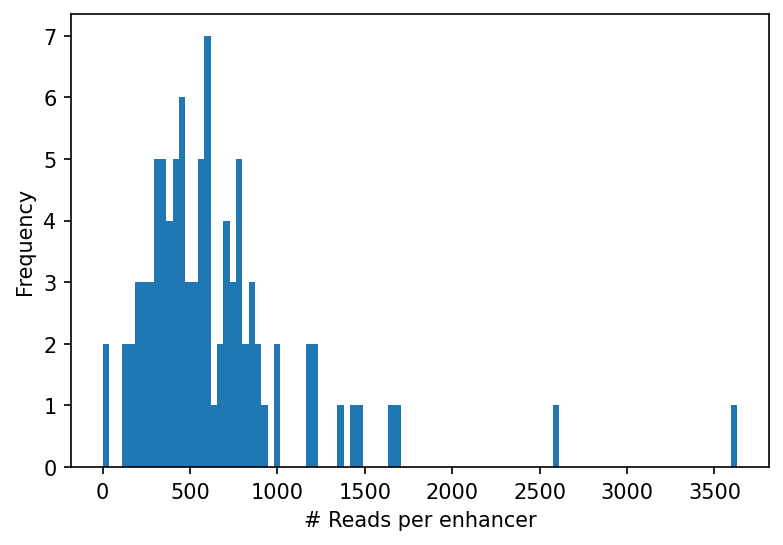

Writing dictionaries...
############################################################################################
############################################################################################
############################################################################################
############################################################################################
############################################################################################



In [15]:
import js # github commit 32863a0 https://github.com/jsolvason/js date May 19 2023
import jsDna as jsd # github commit 32863a0 https://github.com/jsolvason/js date May 19 2023
import pickle

import matplotlib.pyplot as plt


libname2fn={
    'CEQTL1-50L1-BC1' : 'analysis-Amplicon-203-demultiplex.bc1001_BAK8A_OA--bc1001_BAK8A_OA.hifi_reads.fastq',
    'CEQTL2-120L1-BC2': 'analysis-Amplicon-203-demultiplex.bc1002_BAK8A_OA--bc1002_BAK8A_OA.hifi_reads.fastq',
    'CEQTL3-50L2-BC3' : 'analysis-Amplicon-203-demultiplex.bc1003_BAK8A_OA--bc1003_BAK8A_OA.hifi_reads.fastq',
}

## Load enhancer order sheet
enhancerOrderSheet='all_variants_mattoe_joe_ordered_20220127_with_controls_Gata4.tsv'
EnOrderName2Seq={}
EnOrderSeq2Name={}
for row in js.read_tsv(enhancerOrderSheet,pc=False,header=True):
    name,seq=row
    seq=seq[25:-25]
    EnOrderName2Seq[name]=seq
    EnOrderSeq2Name[seq]=name
        
for libName,hifiReads in libname2fn.items():
    
    print(f'Analyzing: {libName}')
    print(f'File: {hifiReads}')
    # Collapse reads

    # For fastq
    read2count={}
    seq=False
    qual=False
    for row in js.read_tsv(hifiReads,pc=False,header=False):

        # if header, continue and indicate the next line will be sequence
        if row[0][0]=='@':
            seq=True

        # If qual line, continue and indicate next line will be qual
        elif row[0][0]=='+':
            qual=True

        elif seq:

            read=row[0]
            # Try adding fwd
            if read in read2count:
                read2count[read]+=1

            # Try adding rev
            elif jsd.revcomp(read) in read2count:
                read2count[jsd.revcomp(read)]+=1

            # If fwd/rev absent, add fwd initialized at 1
            else: 
                read2count[read]=1

            seq=False

        elif qual:
            qual=False



    line_out=''

    for read,count in read2count.items():
        line_out+=js.write_row([read,count])

    with open(f'0-collapsed-hifi-reads-{libName}.tsv','w') as f: f.write(line_out)

    print('\n\n> Reading in all reads...')
    n=len(read2count)
    print(f'Number Unique Reads: {n:,}')

    n=sum(read2count.values())
    print(f'Number Reads:        {n:,}')

    # Determine counts of sequences with linkers present

    # order should be (en)-(scp)-(gfp)-(illuminaR2)-(bc)-(illuminaR1)
    linkername2seq={
        'scp-gfp-illuminaR2':'CCTGCAGGGTACTTATATAAGGGGGTGGGGGCGCGTTCGTCCTCAGTCGCGATCGAACACTCGAGCCGAGCAGACGTGCCTACGGACCGGCGGCCGCCGCCACCATGGCGGATCTGCGAGTACCGGACATTCCGCTCGCCTCGTGTGATGATGATGATATCGATAGTAATAAGAATTTGAGCAACCATTCATCAGACGAGAAACATCACTGCAACAGCAACAGCGACGAGGAACGACTTCATGACGAGTTCTCTGGCTCCCTTGAGGACCTTGTCGGCAACTTTGACGAAAAAATTGCGGCATGCCTGAAGGACCACGAGGTGACGACAGCGGATATTGCACCTGTGCAGATACGTACTCAAGAGGAAGTTATGAATGAAAGCCAAACATGGTGGACATTAACCGGAAACTTTGGAAACATTCAACCTCTCGACTTTGGAACCTCTTCGATATGTAAAAAGATGGCCGCAGCTCTGGACAGTGATTCATTGAAAGACGACGCATCTACACGCCGAAGTATGACAAATTCCGATGATGAGGATCTTTTACGACAACAAATGGATGTTCATCAAATGATTGGACATCATCATGGATCTACGGATACTGGTGGTGAAACACCTCCACAGACTGCTGATCAAGTTATCGAAGAAATTGATGAAATGTTACAGGTCCGGTCGCCACCATGGTGAGCAAGGGCAAGAAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAAGAGCTCAAGGTGACTGGAGTTCAGACGTGTGCTCTTCCGATCTCCTGCAGG',
        'scp-5prime'       :'CCTGCAGGGTACTTATATAAGGGGG',
        'illumina_BC_R2-3prime':'GTGTGCTCTTCCGATCTCCTGCAGG',
        'illumina_BC_R1-5prime':'AGATCGGAAGAGCGTCGTGTAGGGA',
        'illumina_EN_R2-3prime':'GTTCAGACGTGTGCTCTTCCGATCT',
    }

    # Parse enhancer and barcode

    def which_strand_present(pattern,seq):
        if pattern in seq:                return '+'
        elif pattern in jsd.revcomp(seq): return '-'
        else:                             return False


    # order should be (en)-(scp)-(gfp)-(illuminaR2)-(bc)-(illuminaR1)

    enLinker5=linkername2seq['illumina_EN_R2-3prime']
    enLinker3=linkername2seq['scp-5prime']

    n_enLinkerDetected=0
    n_enDetectedInRead=0

    readsWithoutEnhancerLinker=[]
    readsWithoutEnhancer=[]
    readsWithEnhancer=[]

    for read,count in read2count.items():

        # Determine if read needs to be flipped
        strand=which_strand_present(enLinker3,read)
        if strand=='-': read=jsd.revcomp(read)

        if (enLinker5 in read) and (enLinker3 in read):
            n_enLinkerDetected+=1

        else:
            readsWithoutEnhancerLinker.append(read)
            continue

        ######################################################
        # This code only runs if both enhancer linkers are detected
        ######################################################

        en=read.split(enLinker3)[0].split(enLinker5)[-1]

        # check if enhancer is in order sheet
        if en in EnOrderSeq2Name: 
            n_enDetectedInRead+=1

        else: 
            readsWithoutEnhancer.append(read)
            continue

        ######################################################
        # This code only runs if ordered enhancer is detected
        ######################################################

        readsWithEnhancer.append((en,read))


    print('\n\n> Parsing Enhancer Seq Using Linkers...')     
    print(f'{n_enLinkerDetected:,}', 'reads with enLinker')
    print(f'{n_enDetectedInRead:,}', 'reads with en')        


    # order should be (en)-(scp)-(gfp)-(illuminaR2)-(bc)-(illuminaR1)

    bcLinker5=linkername2seq['illumina_BC_R2-3prime']
    bcLinker3=linkername2seq['illumina_BC_R1-5prime']

    n_bcLinkersDetected=0

    readsWithEnhancerAndBarcode=[]

    for en,read in readsWithEnhancer:

        # ensure bc linker present
        if (bcLinker5 in read) and (bcLinker3 in read): 
            n_bcLinkersDetected+=1

        else: continue

        #########################################################
        # This block only runs if bc linkers are present
        #########################################################

        bc=read.split(bcLinker3)[0].split(bcLinker5)[-1]
        readsWithEnhancerAndBarcode.append((en,bc,read))

    print('\n\n> Parsing Barcode Seq Using Linkers...')
    print(f'{n_bcLinkersDetected:,} reads with both bcLinkers detected')

    ## Plot barcode length dist

    data=[len(bc) for en,bc,read in readsWithEnhancerAndBarcode]


    fig,ax=plt.subplots(1,dpi=150)
    plt.hist(data,bins=range(25,35))
    plt.xlabel('barcode length')
    plt.ylabel('Frequency')
    plt.show()

    # Create dictionary

    # Create unfiltered dictionary
    umm_en2bc2count={}
    umm_bc2en2count={}
    for en,bc,read in readsWithEnhancerAndBarcode:

        # map en2bc
        if en not in umm_en2bc2count:
            umm_en2bc2count[en]={}
        if bc not in umm_en2bc2count[en]:
            umm_en2bc2count[en][bc]=0
        umm_en2bc2count[en][bc]+=1

        if bc not in umm_bc2en2count:
            umm_bc2en2count[bc]={}
        if en not in umm_bc2en2count[bc]:
            umm_bc2en2count[bc][en]=0
        umm_bc2en2count[bc][en]+=1



    # Dictionary analysis (u+mm)


    print('\n\n','-----------------------------------------\n'*3)
    print('Analysis of unfiltered library (ie unique + mm barcodes)...')

    ## How many enhancers did we receive?

    orderedEns=set(EnOrderSeq2Name.keys())
    observedEns=set(umm_en2bc2count.keys())
    print('\n\n> Searching for ordered enhancers missing in library...')
    print(len(orderedEns-observedEns),'Enhancers missing in library')

    # which are missng?
    missingEnhancers=orderedEns-observedEns
    for missingEn in missingEnhancers:
        print('\t',EnOrderSeq2Name[missingEn])

    ## Any multiple matches?

    print('\n\n> Searching for multiple matches...')
    multipleMatchBcs=[bc for bc,en2count in umm_bc2en2count.items() if len(en2count)>1]
    percentMultipleMatch=js.percent(len(multipleMatchBcs)/len(umm_bc2en2count),1)
    print('# Bc total =',len(umm_bc2en2count))
    print('# Bc mm    =',len(multipleMatchBcs))
    print('% Bc mm    =',percentMultipleMatch)

    # print a few mm barcodes
    print('\n\nPrinting some examples of multiple match barcodes')
    lc=0
    for mmbc in multipleMatchBcs:
        lc+=1
        print('\t',mmbc,[EnOrderSeq2Name[en] for en in umm_bc2en2count[mmbc]])
        if lc==5: break

    # Dictionary analysis (u bc only)


    print('\n\n','-----------------------------------------\n'*3)
    print('Analysis of filtered library (ie unique barcodes only)...')

    ## Create filtered dictionary

    multipleMatchBcs=set(multipleMatchBcs)

    u_en2bc2count={en:{bc:count for bc,count    in bc2count.items()    if bc not in multipleMatchBcs} for en,bc2count in umm_en2bc2count.items()}
    u_bc2en2count={bc: en2count for bc,en2count in umm_bc2en2count.items() if bc not in multipleMatchBcs}


    ## How many enhancers did we receive?

    orderedEns=set(EnOrderSeq2Name.keys())
    observedEns=set(u_en2bc2count.keys())
    print('\n\n> Searching for ordered enhancers missing in library...')
    print(len(orderedEns-observedEns),'Enhancers missing in library')

    # which are missng?
    missingEnhancers=orderedEns-observedEns
    for missingEn in missingEnhancers:
        print('\t',EnOrderSeq2Name[missingEn])

    ## Any multiple matches?



    print('\n\n> Searching for multiple matches...')
    multipleMatchBcs=[bc for bc,en2count in u_bc2en2count.items() if len(en2count)>1]
    percentMultipleMatch=js.percent(len(multipleMatchBcs)/len(u_bc2en2count),1)
    print('# Bc total =',len(u_bc2en2count))
    print('# Bc mm    =',len(multipleMatchBcs))
    print('% Bc mm    =',percentMultipleMatch)
    
    print('\n\n> Number bc per en on average = ',int(len(u_en2bc2count)/len(u_bc2en2count)))

    ## What is bc readcount dist?

    data=[]
    for en,bc2count in u_en2bc2count.items():
        for bc,count in bc2count.items():
            data.append(count)

    fig,ax=plt.subplots(1,dpi=150)
    plt.hist(data,bins=range(100))
    plt.xlabel('# reads per bc')
    plt.ylabel('Frequency')
    plt.show()

    ## What is bc/en?

    data=[len(bc2count.keys()) for bc2count in u_en2bc2count.values()]
    fig,ax=plt.subplots(1,dpi=150)
    plt.hist(data,bins=100)
    plt.xlabel('# bc / en')
    plt.ylabel('Frequency')
    plt.show()

    ## What is en readcount dist?

    en2count={}
    for en,bc2count in u_en2bc2count.items():
        for bc,count in bc2count.items():
            if en not in en2count:
                en2count[en]=0
            en2count[en]+=count

    data=en2count.values()

    fig,ax=plt.subplots(1,dpi=150)
    plt.hist(data,bins=100)
    plt.xlabel('# Reads per enhancer')
    plt.ylabel('Frequency')
    plt.show()
    
    ## Filter dictionaries for readcount
    
    
    print('Writing dictionaries...')
    
    ubc2en={}
    for bc,en2count in u_bc2en2count.items():
        if len(en2count)>1: raise ValueError('1')
        for en in en2count:
            ubc2en[bc]=en
        
    with open(f'ubc2en.{libName}.pydict.pickle','wb') as f: 
        pickle.dump(ubc2en,f,protocol=pickle.HIGHEST_PROTOCOL)
        
    with open(f'umm_bc2en2count.{libName}.pydict.pickle','wb') as f:
        pickle.dump(umm_bc2en2count,f,protocol=pickle.HIGHEST_PROTOCOL)
    
    print('############################################################################################\n'*5)